In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

lifeexpectancy_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [2]:
lifeexpectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [3]:
lifeexpectancy_df.isnull().sum()*100/lifeexpectancy_df.count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.341530
Adult Mortality                     0.341530
infant deaths                       0.000000
Alcohol                             7.069971
percentage expenditure              0.000000
Hepatitis B                        23.186583
Measles                             0.000000
 BMI                                1.170799
under-five deaths                   0.000000
Polio                               0.650908
Total expenditure                   8.333333
Diphtheria                          0.650908
 HIV/AIDS                           0.000000
GDP                                17.991968
Population                         28.521435
 thinness  1-19 years               1.170799
 thinness 5-9 years                 1.170799
Income composition of resources     6.026705
Schooling                           5.873874
dtype: flo

In [8]:
lifeexpectancy_df[["Total expenditure",
              "Population", "Income composition of resources", "Schooling"]].corr()

,Total expenditure,Population,Income composition of resources,Schooling
Total expenditure,1.000000,-0.079662,0.166682,0.246384
Population,-0.079662,1.000000,-0.008735,-0.031668
Income composition of resources,0.166682,-0.008735,1.000000,0.800092
Schooling,0.246384,-0.031668,0.800092,1.000000


In [9]:
#"Life expectancy", not included? why?

In [25]:

lifeexpectancy_df[["Total expenditure", "Life expectancy ",
              "Population", "Status", "percentage expenditure", "Adult Mortality", "Hepatitis B", "Alcohol", "Income composition of resources", "GDP", "Schooling"]].corr()

,Total expenditure,Life expectancy,Population,percentage expenditure,Adult Mortality,Hepatitis B,Alcohol,Income composition of resources,GDP,Schooling
Total expenditure,1.000000,0.218086,-0.079662,0.174420,-0.115281,0.058280,0.296942,0.166682,0.138364,0.246384
Life expectancy,0.218086,1.000000,-0.021538,0.381864,-0.696359,0.256762,0.404877,0.724776,0.461455,0.751975
Population,-0.079662,-0.021538,1.000000,-0.025662,-0.013647,-0.123321,-0.035252,-0.008735,-0.028270,-0.031668
percentage expenditure,0.174420,0.381864,-0.025662,1.000000,-0.242860,0.016274,0.341285,0.381952,0.899373,0.389687
Adult Mortality,-0.115281,-0.696359,-0.013647,-0.242860,1.000000,-0.162476,-0.195848,-0.457626,-0.296049,-0.454612
Hepatitis B,0.058280,0.256762,-0.123321,0.016274,-0.162476,1.000000,0.087549,0.199549,0.083903,0.231117
Alcohol,0.296942,0.404877,-0.035252,0.341285,-0.195848,0.087549,1.000000,0.450040,0.354712,0.547378
Income composition of resources,0.166682,0.724776,-0.008735,0.381952,-0.457626,0.199549,0.450040,1.000000,0.460341,0.800092
GDP,0.138364,0.461455,-0.028270,0.899373,-0.296049,0.083903,0.354712,0.460341,1.000000,0.448273
Schooling,0.246384,0.751975,-0.031668,0.389687,-0.454612,0.231117,0.547378,0.800092,0.448273,1.000000


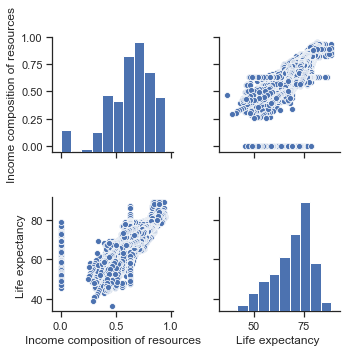

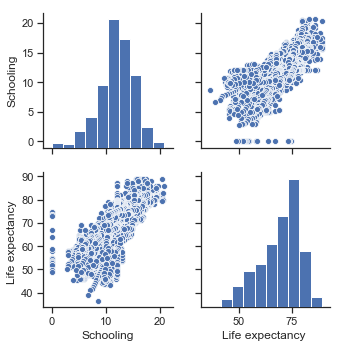

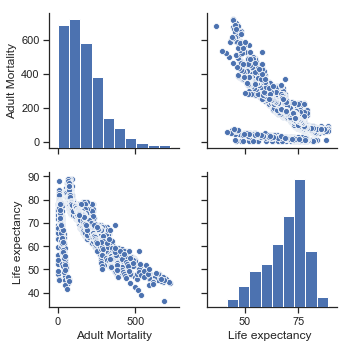

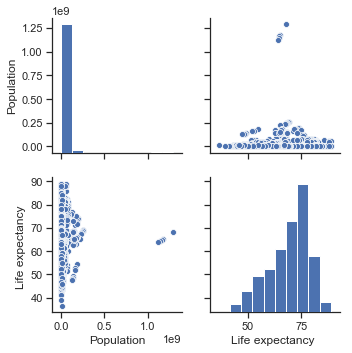

In [37]:
import seaborn as sns
sns.set(style="ticks") 
#hue="Country (region)"
sns.pairplot(lifeexpectancy_df[['Income composition of resources', 'Life expectancy ']])
sns.pairplot(lifeexpectancy_df[['Schooling', 'Life expectancy ']])
sns.pairplot(lifeexpectancy_df[['Adult Mortality', 'Life expectancy ']])
sns.pairplot(lifeexpectancy_df[['Population', 'Life expectancy ']])

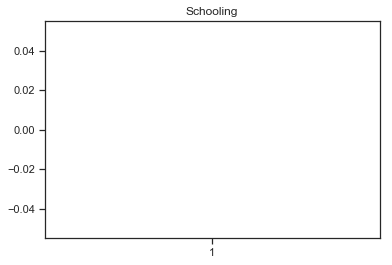

In [20]:
import matplotlib.pyplot as plt

plt.title("Schooling")
plt.boxplot(lifeexpectancy_df["Schooling"])
plt.show()

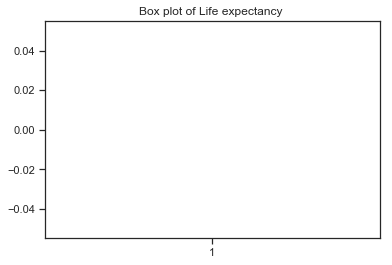

In [21]:
import matplotlib.pyplot as plt

plt.title("Box plot of Life expectancy ")
plt.boxplot(lifeexpectancy_df["Life expectancy "])
plt.show()

In [22]:
print(lifeexpectancy_df.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

     ...      Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0    ...        6.0               8.16

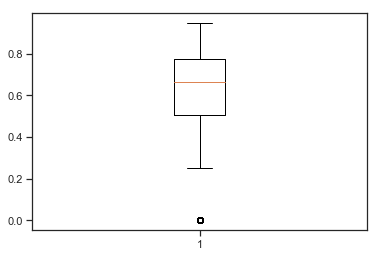

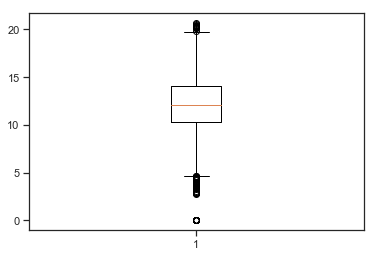

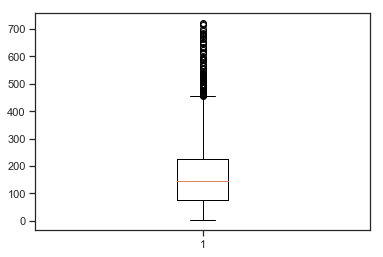

In [30]:
lifeexpectancy_df["Income composition of resources"].fillna(lifeexpectancy_df["Income composition of resources"].mean(), inplace=True)
lifeexpectancy_df["Schooling"].fillna(lifeexpectancy_df["Schooling"].mean(), inplace=True)
lifeexpectancy_df["Adult Mortality"].fillna(lifeexpectancy_df["Adult Mortality"].mean(), inplace=True)

plt.boxplot(lifeexpectancy_df["Income composition of resources"])
plt.show()

plt.boxplot(lifeexpectancy_df["Schooling"])
plt.show()

plt.boxplot(lifeexpectancy_df["Adult Mortality"])
plt.show()



In [31]:
lifeexpectancy_df.isnull().sum()*100/lifeexpectancy_df.count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.341530
Adult Mortality                     0.000000
infant deaths                       0.000000
Alcohol                             7.069971
percentage expenditure              0.000000
Hepatitis B                        23.186583
Measles                             0.000000
 BMI                                1.170799
under-five deaths                   0.000000
Polio                               0.650908
Total expenditure                   8.333333
Diphtheria                          0.650908
 HIV/AIDS                           0.000000
GDP                                17.991968
Population                         28.521435
 thinness  1-19 years               1.170799
 thinness 5-9 years                 1.170799
Income composition of resources     0.000000
Schooling                           0.000000
dtype: flo

In [33]:
from scipy.stats import zscore
import numpy as np

z_scores = zscore(lifeexpectancy_df["Income composition of resources"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    

z_scores = zscore(lifeexpectancy_df["Schooling"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

z_scores = zscore(lifeexpectancy_df["Adult Mortality"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([ 113,  114,  115,  116,  117,  118,  119,  120,  121,  122,  123,
        124,  125,  126,  127,  128,  129,  130,  131,  132,  133,  134,
        135,  136,  137,  138,  139,  140,  141,  142,  143,  144,  241,
        242,  243,  244,  245,  246,  247,  248,  249,  250,  251,  252,
        253,  254,  255,  256,  369,  370,  371,  372,  373,  374,  375,
        376,  377,  378,  379,  496,  497,  498,  499,  500,  501,  502,
        503,  504,  505,  506,  507,  508,  509,  510,  511,  544,  545,
        673,  674,  675,  676,  677,  678,  679,  680,  681,  737,  738,
        739,  740,  741,  742,  743,  744,  745,  746,  747,  748,  749,
        750,  751,  752,  825,  867,  868,  869,  870,  871,  872,  873,
        874,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  

In [35]:
from scipy.stats.mstats import winsorize

winsorized_income_comp = winsorize(lifeexpectancy_df["Income composition of resources"], (0, 0.05))

winsorized_schooling = winsorize(lifeexpectancy_df["Schooling"], (0, 0.05))

winsorized_adult_mortality = winsorize(lifeexpectancy_df["Adult Mortality"], (0, 0.05))


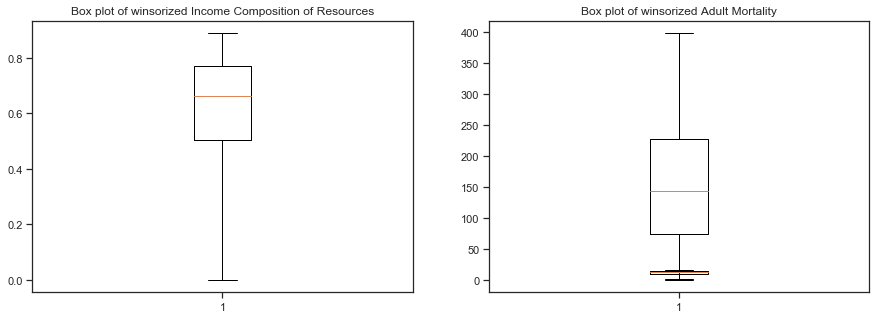

In [36]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorized_income_comp, whis = 5)
plt.title("Box plot of winsorized Income Composition of Resources")

plt.subplot(1,2,2)
plt.boxplot(winsorized_schooling, whis = 5)
plt.title("Box plot of winsorized Schooling")


plt.subplot(1,2,2)
plt.boxplot(winsorized_adult_mortality , whis = 5)
plt.title("Box plot of winsorized Adult Mortality")
plt.show()


In [38]:
#it appears Schooling and Income composition of resources (Human Development Index in terms of income composition of resources (index ranging from 0 to 1)) had the highest positive impact on life expectancy 

# Adult Mortality was the only factor that negatively impacted life expectancy significantly 

#For this reason, I have chosen to focus solely on Adult Mortality, Schooling and Income composition of resources and this is what I would choose for my features for the purposes of modleing 


AttributeError: 'DataFrame' object has no attribute 'Income_Composition_of_Resources'

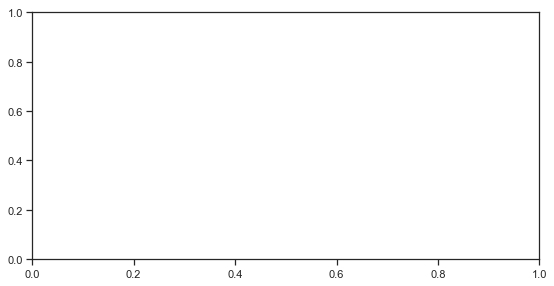

In [40]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(lifeexpectancy_df.Income_Composition_of_Resources.dropna())
plt.title("histogram of {}".format("Income Composition of Resources"))

plt.subplot(2,2,2)
plt.hist(lifeexpectancy_df.Adult_Mortality.dropna())
plt.title("histogram of {}".format("Adult Mortality"))

plt.subplot(2,2,3)
plt.hist(lifeexpectancy_df.Schooling.dropna())
plt.title("histogram of {}".format("Schooling"))

plt.show()

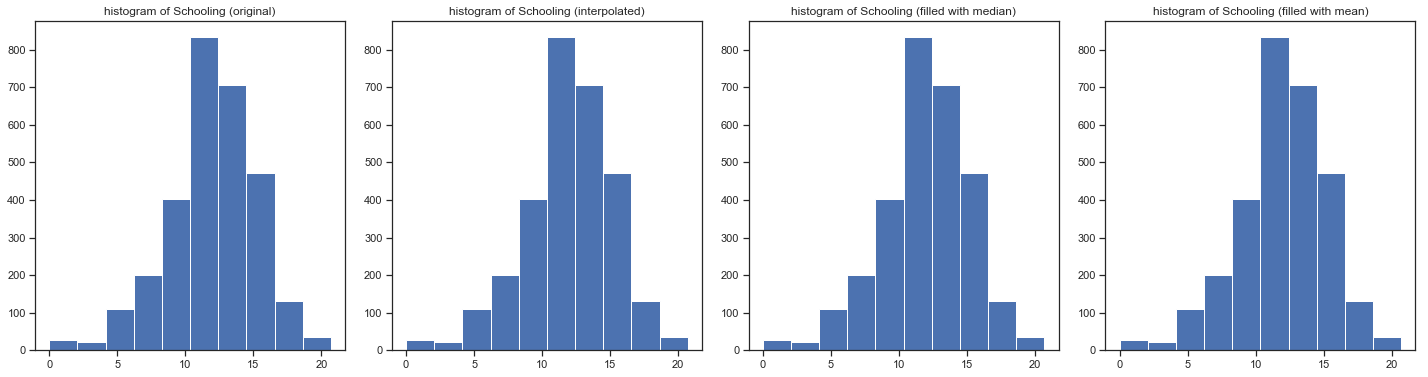

In [44]:

plt.figure(figsize=(20,20))


plt.subplot(4,4,9)
plt.hist(lifeexpectancy_df.Schooling.dropna())
plt.title("histogram of {} (original)".format("Schooling"))

plt.subplot(4,4,10)
plt.hist(lifeexpectancy_df.Schooling.interpolate())
plt.title("histogram of {} (interpolated)".format("Schooling"))

plt.subplot(4,4,11)
plt.hist(lifeexpectancy_df.Schooling.fillna(lifeexpectancy_df.Schooling.median()))
plt.title("histogram of {} (filled with median)".format("Schooling"))

plt.subplot(4,4,12)
plt.hist(lifeexpectancy_df.Schooling.fillna(lifeexpectancy_df.Schooling.mean()))
plt.title("histogram of {} (filled with mean)".format("Schooling"))

plt.tight_layout()
plt.show()


In [ ]:



plt.subplot(4,4,1)
plt.hist(lifeexpectancy_df.Income Composition of Resources.dropna())
plt.title("histogram of {} (original)".format("Income Composition of Resources"))

plt.subplot(4,4,2)
plt.hist(lifeexpectancy_df.Income Composition of Resources.interpolate())
plt.title("histogram of {} (interpolated)".format("Income Composition of Resources"))

plt.subplot(4,4,3)
plt.hist(lifeexpectancy_df.AVG_MATH_4_SCORE.fillna(education_df.Income Composition of Resources.median()))
plt.title("histogram of {} (filled with median)".format("Income Composition of Resources"))

plt.subplot(4,4,4)
plt.hist(lifeexpectancy_df.AVG_MATH_4_SCORE.fillna(education_df.Income Composition of Resources.mean()))
plt.title("histogram of {} (filled with mean)".format("Income Composition of Resources"))


plt.subplot(4,4,5)
plt.hist(lifeexpectancy_df.Adult Mortality.dropna())
plt.title("histogram of {} (original)".format("Adult Mortality"))

plt.subplot(4,4,6)
plt.hist(lifeexpectancy_df.Adult Mortality.interpolate())
plt.title("histogram of {} (interpolated)".format("Adult Mortality"))

plt.subplot(4,4,7)
plt.hist(lifeexpectancy_df.AVG_READING_4_SCORE.fillna(education_df.Adult Mortality.median()))
plt.title("histogram of {} (filled with median)".format("Adult Mortality"))

plt.subplot(4,4,8)
plt.hist(lifeexpectancy_df.AVG_READING_4_SCORE.fillna(education_df.Adult Mortality.mean()))
plt.title("histogram of {} (filled with mean)".format("Adult Mortality"))

